In [2]:
import pandas as pd
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.7.0


In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [8]:
#sns.distplot(df.duration)

In [9]:
#df.duration.describe(percentiles=[0.95,0.98,0.99])

In [10]:
#(df.duration >=1)

In [11]:
df.PULocationID.dtype

dtype('O')

In [14]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 185763 stored elements and shape (61921, 500)>

In [15]:
#dv.feature_names_

In [17]:
y_train

array([17.91666667,  6.5       , 15.25      , ..., 14.        ,
        7.        ,  7.        ], shape=(61921,))

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


/tmp/ipykernel_3538/437147669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_3538/437147669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


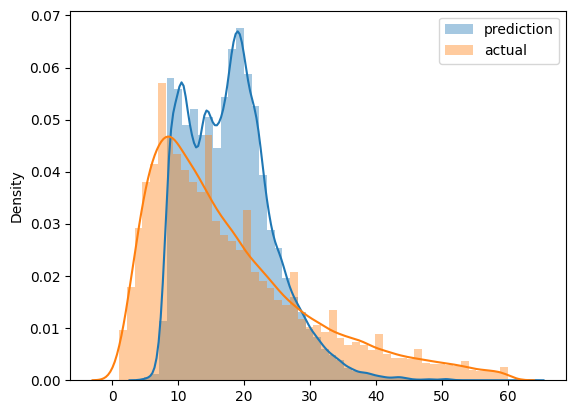

In [20]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()


10.30226933695004

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

array([15.228373  , 14.53034984, 23.05575209, ..., 10.53801728,
       10.4143114 ,  9.54023871], shape=(61921,))

In [25]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    categorical = ['PULocationID','DOLocationID']
    
    df[categorical] = df[categorical].astype(str)

    return df

In [31]:
df_train = read_dataframe('data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('data/green_tripdata_2021-02.parquet')

In [29]:
len(df_train), len(df_val)

(73908, 61921)

In [32]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv=DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val =dv.transform(val_dicts)

In [42]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values



In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

10.499110710357629

In [47]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'models/lin_reg.bin'

In [45]:
lr = Lasso(alpha=0.001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

10.481255832615487